## Traffic Flow: Part B

In [122]:
import numpy                       
from matplotlib import pyplot                 
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

### Parameters

In [123]:
nx=51
dx = 2./(nx-1)
V_max = 136
L=11
rho_max = 250
dt = 0.001

### Initial Conditions for t = 0

In [124]:
x = numpy.linspace(0,L,nx)
rho0 = numpy.ones(nx)*20 ##note this change: was 10 before
rho0[10:20] = 50

#### Density

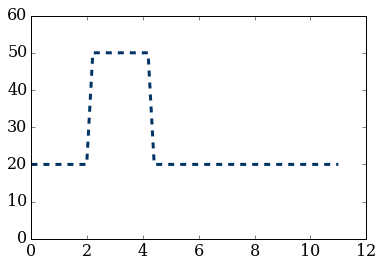

In [125]:
pyplot.plot(x, rho0, color='#003366', ls='--', lw=3)
pyplot.ylim(0,60);

#### Velocity

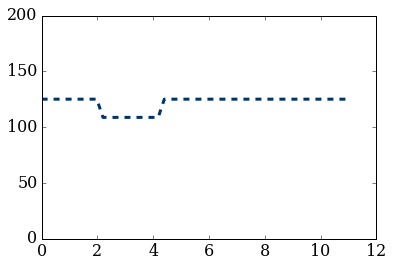

In [126]:
vel_t0 = V_max*(1-(rho0/float(rho_max)))
pyplot.plot(x, vel_t0, color='#003366', ls='--', lw=3)
pyplot.ylim(0,200);

#### Velocity conversion function

In [127]:
def conversion(v):
    return (v*1000) / (60 * 60)

### Question: Minimum velocity at t = 0

In [128]:
vel_t0 = V_max*(1-rho0/float(rho_max))
min_vel = conversion(min(vel_t0))
print("The minimum velocity at t=0 is {}.".format(min_vel))

The minimum velocity at t=0 is 30.222222222222225.


In [129]:
conversion(vel_t0)

array([ 34.75555556,  34.75555556,  34.75555556,  34.75555556,
        34.75555556,  34.75555556,  34.75555556,  34.75555556,
        34.75555556,  34.75555556,  30.22222222,  30.22222222,
        30.22222222,  30.22222222,  30.22222222,  30.22222222,
        30.22222222,  30.22222222,  30.22222222,  30.22222222,
        34.75555556,  34.75555556,  34.75555556,  34.75555556,
        34.75555556,  34.75555556,  34.75555556,  34.75555556,
        34.75555556,  34.75555556,  34.75555556,  34.75555556,
        34.75555556,  34.75555556,  34.75555556,  34.75555556,
        34.75555556,  34.75555556,  34.75555556,  34.75555556,
        34.75555556,  34.75555556,  34.75555556,  34.75555556,
        34.75555556,  34.75555556,  34.75555556,  34.75555556,
        34.75555556,  34.75555556,  34.75555556])

In [130]:
rho0

array([ 20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  50.,
        50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  50.,  20.,  20.,
        20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,
        20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,  20.,
        20.,  20.,  20.,  20.,  20.,  20.,  20.])

### Loop

In [134]:
nt = 50 #250  # run for 3 mins
rho3 = rho0.copy()

for n in range(1, nt):  
    rho_n = rho3.copy() 
    rho3[1:] = rho_n[1:] + dt/(dx) * (rho_n[0:-1]-rho_n[1:])
    rho3[0] = 20.0 #10.0

### Question: Average velocity at t = 3

In [135]:
vel_t3 = V_max*(1-rho3/float(rho_max))
vel_t3_conv = conversion(vel_t3)
vel_t3_conv_mean = numpy.mean(vel_t3_conv)
vel_t3_conv_min = numpy.min(vel_t3_conv)
print("The average velocity at t=3 is {}.".format(vel_t3_conv_mean))
print("The minimum velocity at t=3 is {}.".format(vel_t3_conv_min))

The average velocity at t=3 is 33.86666666666666.
The minimum velocity at t=3 is 30.222223676675128.


In [120]:
vel_t3_conv

array([ 34.75555556,  34.75555556,  34.75555556,  34.75555556,
        34.75555556,  34.75555556,  34.75555556,  34.75555556,
        34.75555556,  34.75555556,  33.44443139,  31.79712154,
        30.7833924 ,  30.37616787,  30.25608884,  30.2283783 ,
        30.22316777,  30.22234706,  30.22223658,  30.22222368,
        31.53334652,  33.18065625,  34.19438538,  34.60160991,
        34.72168894,  34.74939948,  34.75461001,  34.75543072,
        34.7555412 ,  34.7555541 ,  34.75555542,  34.75555555,
        34.75555555,  34.75555556,  34.75555556,  34.75555556,
        34.75555556,  34.75555556,  34.75555556,  34.75555556,
        34.75555556,  34.75555556,  34.75555556,  34.75555556,
        34.75555556,  34.75555556,  34.75555556,  34.75555556,
        34.75555556,  34.75555556,  34.75555556])

#### Velocity

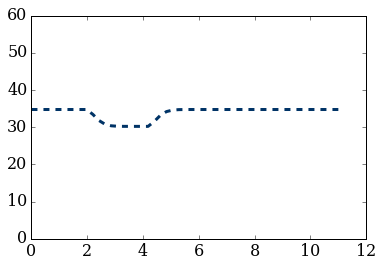

In [121]:
pyplot.plot(x, vel_t3_conv, color='#003366', ls='--', lw=3)
pyplot.ylim(0,60);